In [1]:
import os
import open3d as o3d
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
# Pcd files
#pcd_folder = "C:/Users/yanpe/OneDrive - Metropolia Ammattikorkeakoulu Oy/Research/data/smartlab/labelled/"
#pcd_path = pcd_folder + "Smartlab_aalto_pcd_s3dis_label_pointnet2_x6_0.03_20250422.ply"
#pcd_path = pcd_folder + "Smartlab_aalto_pcd_finetuned_label_pointnet2_x3_0.03_20250416.ply"
#pcd_path = pcd_folder + "Smartlab_aalto_pcd_s3dis_label_pointnet2_x3_0.03_20250423.ply"
#pcd_path = pcd_folder + "Smartlab_pcd_lora_label_pointnet2_x3_0.03_20250426.ply"
#pcd_path = r"C:\Users\yanpe\OneDrive - Metropolia Ammattikorkeakoulu Oy\Research\data\hexagon\Fira- 1001.ply"

pcd_path = "../docs/downpcd_lablled.pcd"
pcd = o3d.io.read_point_cloud(pcd_path)

In [6]:
o3d.visualization.draw_geometries([pcd], point_show_normal=False)

In [1]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial import cKDTree
import open3d as o3d

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from pc_seg.pc_label_map import color_map_dict

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# Invert the colormap to get RGB → label index
rgb_to_label = {tuple(v[0]): k for k, v in color_map_dict.items()}
label_to_name = {k: v[1] for k, v in color_map_dict.items()}

def get_label_from_color(color_array):
    """Match color to closest known semantic color label."""
    labels = []
    for c in color_array:
        # Round to 3 decimals to avoid float precision mismatch
        key = tuple(np.round(c, 3))
        label = rgb_to_label.get(key, -1)  # -1 if unmatched
        labels.append(label)
    return np.array(labels)

In [3]:
# Load the ground truch point cloud

#smartlab_path = "../docs/SmartLab_2024_E57_Single_5mm_SEG_colors.ply" # Manually labelled ground truth
smartlab_path = "../docs/smartLab_simulated.ply" # Simulated from IFC model

pcd = o3d.io.read_point_cloud(smartlab_path) 

In [4]:
o3d.visualization.draw_geometries([pcd], point_show_normal=False)

In [5]:
def print_label_counts(label_array, name="Point Cloud"):
    print(f"\n📦 Label counts for {name}:")
    unique_labels, counts = np.unique(label_array, return_counts=True)
    total_points = len(label_array)
    for label, count in zip(unique_labels, counts):
        class_name = label_to_name.get(label, f"Class {label}")
        percentage = (count / total_points) * 100
        print(f"  {label:2d} ({class_name:10s}): {count:6d} points ({percentage:5.2f}%)")

In [6]:
# Extract point coordinates and colors
points = np.asarray(pcd.points)
origin_colors = np.asarray(pcd.colors)
colors = np.round(origin_colors, 1)

# Convert color to semantic labels
labels = get_label_from_color(colors)

In [7]:
# Ground Truth
print(f'{len(points)} in total')
print_label_counts(labels, name="Ground Truth")

# Prediction
#print_label_counts(pred_labels, name="Prediction")

13958161 in total

📦 Label counts for Ground Truth:
   0 (ceiling   ): 3216123 points (23.04%)
   1 (floor     ): 2574746 points (18.45%)
   2 (wall      ): 5412366 points (38.78%)
   3 (beam      ):  21448 points ( 0.15%)
   4 (column    ):  36577 points ( 0.26%)
   5 (window    ): 291669 points ( 2.09%)
   6 (door      ): 355612 points ( 2.55%)
   7 (table     ):  14756 points ( 0.11%)
   8 (chair     ):  35844 points ( 0.26%)
   9 (sofa      ): 176263 points ( 1.26%)
  10 (bookcase  ): 274664 points ( 1.97%)
  11 (board     ):  38795 points ( 0.28%)
  12 (clutter   ): 1509298 points (10.81%)


In [8]:
def visualize_label_distribution(label_array, label_to_name, title="Label Distribution"):
    unique_labels, counts = np.unique(label_array, return_counts=True)
    total_points = len(label_array)
    
    labels = [label_to_name.get(label, f"Class {label}") for label in unique_labels]
    percentages = (counts / total_points) * 100

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, counts, color='skyblue')
    
    # Annotate percentage above each bar
    for bar, pct in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', 
                 ha='center', va='bottom', fontsize=10)

    plt.title(title)
    plt.xlabel("Labels")
    plt.ylabel("Number of Points")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

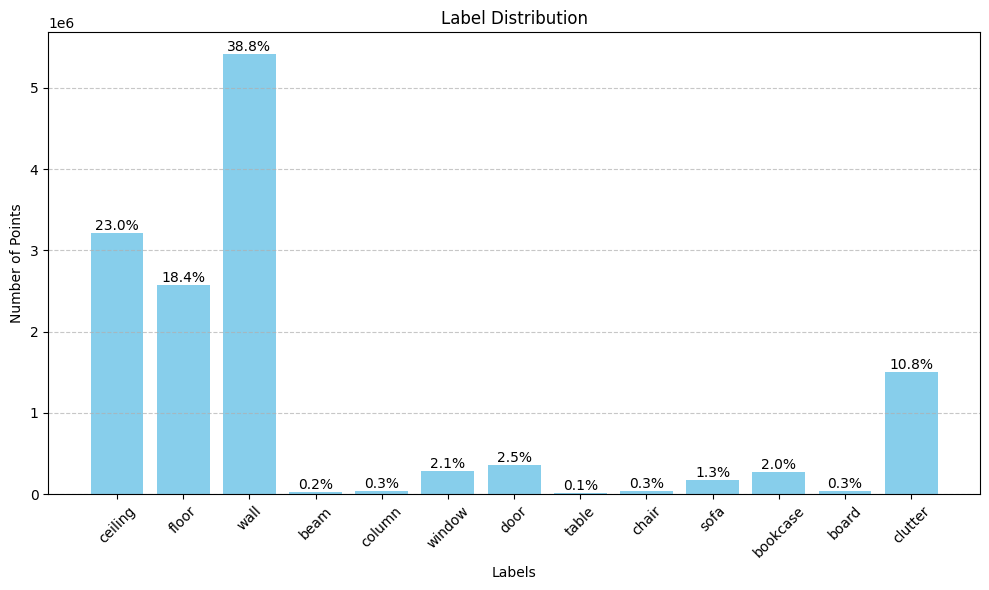

In [9]:
visualize_label_distribution(labels, label_to_name)